In [2]:
import warnings             
warnings.filterwarnings(action='ignore')          # 경고 문구 무시
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"   # 셀 하나에 ouput 모두 출력 가능
import numpy as np                            
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#  한글글꼴로 변경
plt.rcParams['font.size'] = 12.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'
# 음수 표시 에러 
mpl.rcParams['axes.unicode_minus'] = False
import json
pd.options.display.max_rows= 10    # 화면에 최대 12개까지 결과 출력
np.random.seed(12345)

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from datetime import datetime
from datetime import timedelta
pd.options.display.max_rows= 10    # 화면에 최대 12개까지 결과 출력
np.random.seed(12345)

In [3]:
kakao_sise = pd.read_csv('kakao_sise.csv', index_col=[0]) #
kakao_sise['code'] = '035720'
kakao_sise['종목명'] = '카카오'
kakao_sise['증가율'] = (kakao_sise.종가 / kakao_sise.종가.shift(1)-1).fillna(0)
samsung_sise = pd.read_csv('samsung_sise.csv', index_col=[0]) #
samsung_sise['code'] = '005930'
samsung_sise['종목명'] = '삼성전자'
samsung_sise['증가율'] = (samsung_sise.종가 / samsung_sise.종가.shift(1)-1).fillna(0)
samsungwu_sise =pd.read_csv('samsungwu_sise.csv', index_col=[0]) #
samsungwu_sise['code'] = '005935'
samsungwu_sise['종목명'] = '삼성전자우'
samsungwu_sise['증가율'] = (samsungwu_sise.종가 / samsungwu_sise.종가.shift(1)-1).fillna(0)
sk_sise = pd.read_csv('sk_sise.csv', index_col=[0]) #
sk_sise['code'] = '000660'
sk_sise['종목명']= 'SK하이닉스'
sk_sise['증가율'] =( sk_sise.종가 / sk_sise.종가.shift(1)-1).fillna(0)
naver_sise = pd.read_csv('naver_sise.csv', index_col=[0])  #
naver_sise['code'] = '035420'
naver_sise['종목명'] = '네이버'
naver_sise['증가율'] = (naver_sise.종가 / naver_sise.종가.shift(1)-1).fillna(0)

In [4]:
sise_data = samsung_sise.copy()
sise_data=pd.concat([sise_data, sk_sise, kakao_sise, naver_sise, samsungwu_sise])
sise_data.날짜 = pd.to_datetime(sise_data.날짜, format='%Y%m%d')
sise_data.tail(10)

,날짜,시가,고가,저가,종가,거래량,외국인소진율,code,종목명,증가율
2820,2021-06-08,74200,74600,74200,74200,1058237,76.51,005935,삼성전자우,-0.004027
2821,2021-06-09,74200,74400,74000,74200,835679,76.54,005935,삼성전자우,0.000000
2822,2021-06-10,74000,74200,73900,73900,828699,76.51,005935,삼성전자우,-0.004043
2823,2021-06-11,73900,74400,73900,74300,796762,76.51,005935,삼성전자우,0.005413
2824,2021-06-14,74300,74400,73900,74200,764898,76.51,005935,삼성전자우,-0.001346
2825,2021-06-15,74300,74400,74100,74300,838110,76.50,005935,삼성전자우,0.001348
2826,2021-06-16,74300,74700,74300,74700,923875,76.53,005935,삼성전자우,0.005384
2827,2021-06-17,74700,74800,74300,74300,973761,76.54,005935,삼성전자우,-0.005355
2828,2021-06-18,74500,74600,74000,74000,1426525,76.51,005935,삼성전자우,-0.004038
2829,2021-06-21,73800,73900,73500,73700,1128808,76.51,005935,삼성전자우,-0.004054


In [ ]:
sise_data['전일비']  = sise_data.종가.diff().fillna(0)
sise_data

Text(0.5, 0, '증가율')

Text(0, 0.5, '거래량')

Text(0.5, 0, '증가율')

Text(0, 0.5, '거래량')

Text(0.5, 0, '증가율')

Text(0, 0.5, '거래량')

Text(0.5, 0, '증가율')

Text(0, 0.5, '거래량')

Text(0.5, 0, '증가율')

Text(0, 0.5, '거래량')

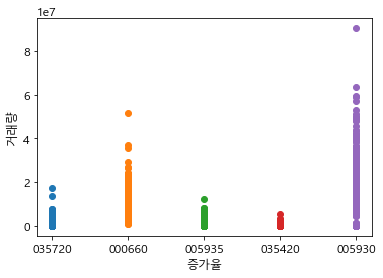

In [6]:
for name in set(sise_data.code):
    plt.scatter(sise_data[sise_data.code==name].code, sise_data[sise_data.code==name].거래량);
    plt.xlabel('증가율')
    plt.ylabel('거래량')

In [36]:
sise_data[sise_data.종목명=='카카오'].거래량

0        158976
1        124156
2         72453
3         99241
4        114818
         ...   
2825    4950329
2826    4996272
2827    5408889
2828    7706345
2829    7656573
Name: 거래량, Length: 2830, dtype: int64

Text(0.5, 0, '증가율')

Text(0, 0.5, '거래량')

(0.0, 17115015.0)

Text(0.5, 1.0, '카카오 거래량과 주가 증가율 산점도')

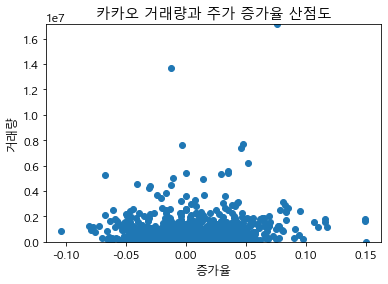

In [33]:
plt.scatter(kakao_sise.증가율, kakao_sise.거래량)
plt.xlabel('증가율')
plt.ylabel('거래량')
min = sise_data[sise_data.종목명=='카카오'].거래량.min()
max = sise_data[sise_data.종목명=='카카오'].거래량.max()
plt.ylim(min, max)
plt.title('카카오 거래량과 주가 증가율 산점도')
plt.savefig('figures/카카오_거래량_증가율.png')

Text(0.5, 0, '증가율')

Text(0, 0.5, '거래량')

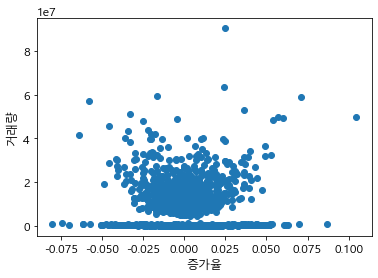

In [7]:
plt.scatter(samsung_sise.증가율, samsung_sise.거래량)
plt.xlabel('증가율')
plt.ylabel('거래량')
plt.savefig('figures/삼성_거래량_증가율.png')

Text(0.5, 0, '증가율')

Text(0, 0.5, '거래량')

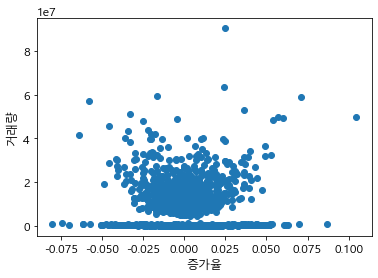

In [8]:
plt.scatter(samsung_sise.증가율, samsung_sise.거래량)
plt.xlabel('증가율')
plt.ylabel('거래량')

Text(0.5, 0, '증가율')

Text(0, 0.5, '거래량')

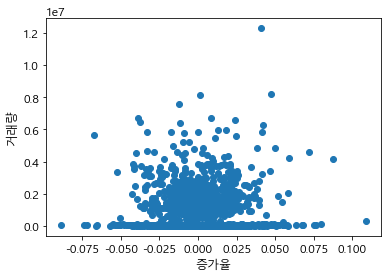

In [9]:
plt.scatter(samsungwu_sise.증가율, samsungwu_sise.거래량)
plt.xlabel('증가율')
plt.ylabel('거래량')
plt.savefig('figures/삼성우_거래량_증가율.png')

Text(0.5, 0, '증가율')

Text(0, 0.5, '거래량')

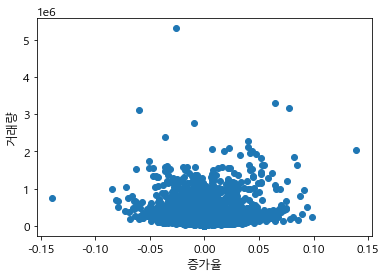

In [10]:
plt.scatter(naver_sise.증가율, naver_sise.거래량)
plt.xlabel('증가율')
plt.ylabel('거래량')
plt.savefig('figures/네이버_거래량_증가율.png')

Text(0.5, 0, '증가율')

Text(0, 0.5, '거래량')

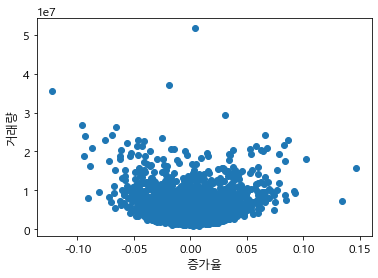

In [11]:
plt.scatter(sk_sise.증가율, sk_sise.거래량)
plt.xlabel('증가율')
plt.ylabel('거래량')
plt.savefig('figures/SK_거래량_증가율.png')